# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [340]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib inline
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.

In [9]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [385]:
# Function to compute cluster centroids manually
def compute_centroids(X, labels, num_clusters):
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(num_clusters)])
    return centroids

# Updated colors for better visualization
color = 'brgcmyk'  #List colors

# Modified function for hierarchical clustering with centroids
def display_cluster(X, labels=[], num_clusters=0,title="",legend=True):
    alpha = 0.7  
    s = 40  # Size of points
    plt.figure(figsize=(8, 6))
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:    
        # Compute estimated centroids
        centroids = compute_centroids(X, labels, num_clusters)
    
        for i in range(num_clusters):
            plt.scatter(X[labels == i, 0], X[labels == i, 1], c=color[i % len(color)], alpha=alpha, s=s, label=f'Cluster {i}')
            plt.scatter(centroids[i, 0], centroids[i, 1], c='black', marker='X', s=150, edgecolors='white', linewidth=2)
        if legend:
            plt.legend()
    plt.title(f'{title} ({num_clusters} Clusters)')
    plt.show()

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



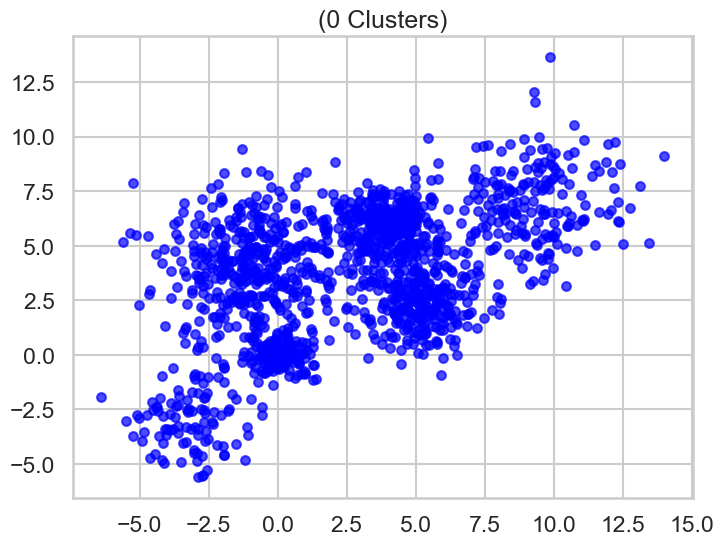

In [134]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [136]:
Multi_blob_Data_Scaled = StandardScaler().fit_transform(Multi_blob_Data)
Multi_blob_Data_Scaled

array([[-1.26719967, -2.24928146],
       [-1.2175423 , -1.5406789 ],
       [-1.50759118, -2.29017465],
       ...,
       [ 1.82415545,  3.28071405],
       [ 0.70912955,  2.05274183],
       [ 1.48190485,  1.25100904]])

### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

#### Different values of K

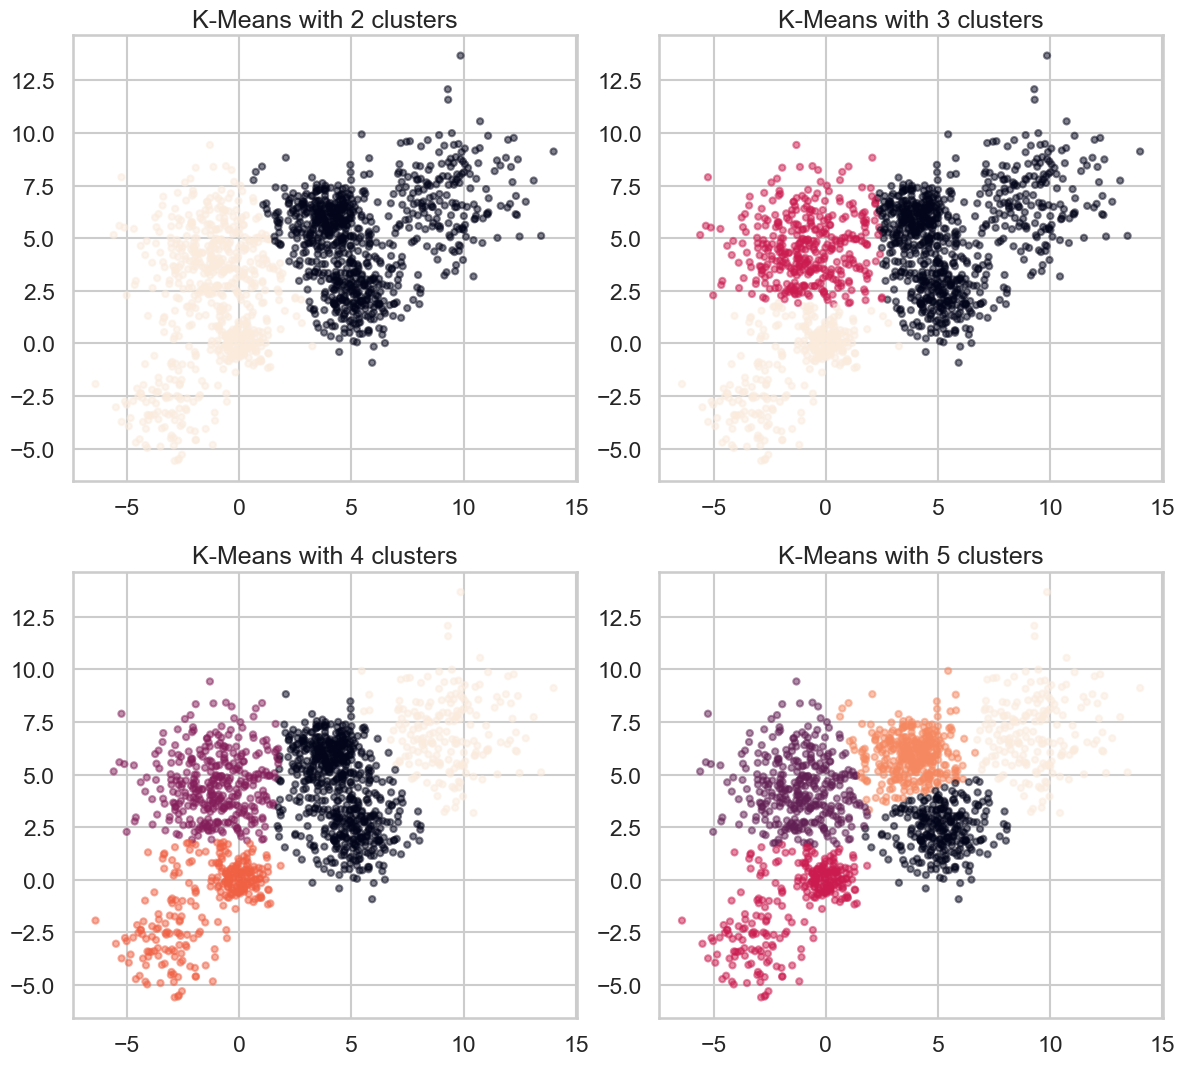

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(12, 11))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten to iterate easily

for i, k in enumerate(range(2, 6)):
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(Multi_blob_Data)

    axes[i].scatter(Multi_blob_Data[:, 0],  
                    Multi_blob_Data[:, 1],    
                    c=cluster_labels, alpha=0.5, s=20)
    axes[i].set_title(f'K-Means with {k} clusters')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### Distortion and Siluette Score 

In [110]:
ssd = []
sil_score = []
for k in range(2,15,1):
    model = KMeans(n_clusters=k)
    model.fit(Multi_blob_Data)
    cluster_labels = model.fit_predict(Multi_blob_Data)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    sil_score.append(silhouette_score(Multi_blob_Data, cluster_labels))
    

Text(0, 0.5, 'silhouette_score')

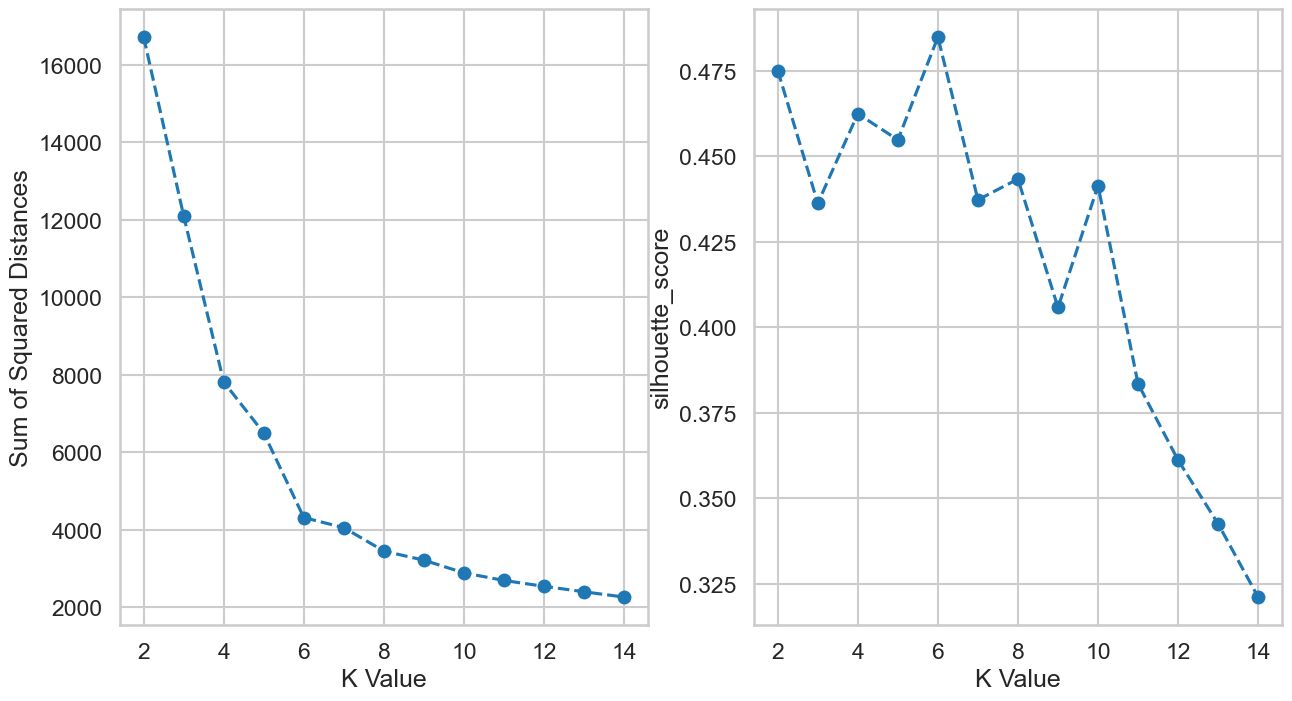

In [111]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 8))
ax1.plot(range(2,15,1), ssd, 'o--')
ax1.set_xlabel("K Value")
ax1.set_ylabel("Sum of Squared Distances")

ax2.plot(range(2,15,1), sil_score, 'o--')
ax2.set_xlabel("K Value")
ax2.set_ylabel("silhouette_score")


Scaling the data

In [112]:
ssd = []
sil_score = []
for k in range(2,15,1):
    model = KMeans(n_clusters=k)
    model.fit(Multi_blob_Data_Scaled)
    cluster_labels = model.fit_predict(Multi_blob_Data_Scaled)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    sil_score.append(silhouette_score(Multi_blob_Data_Scaled, cluster_labels))
    

Text(0, 0.5, 'silhouette_score')

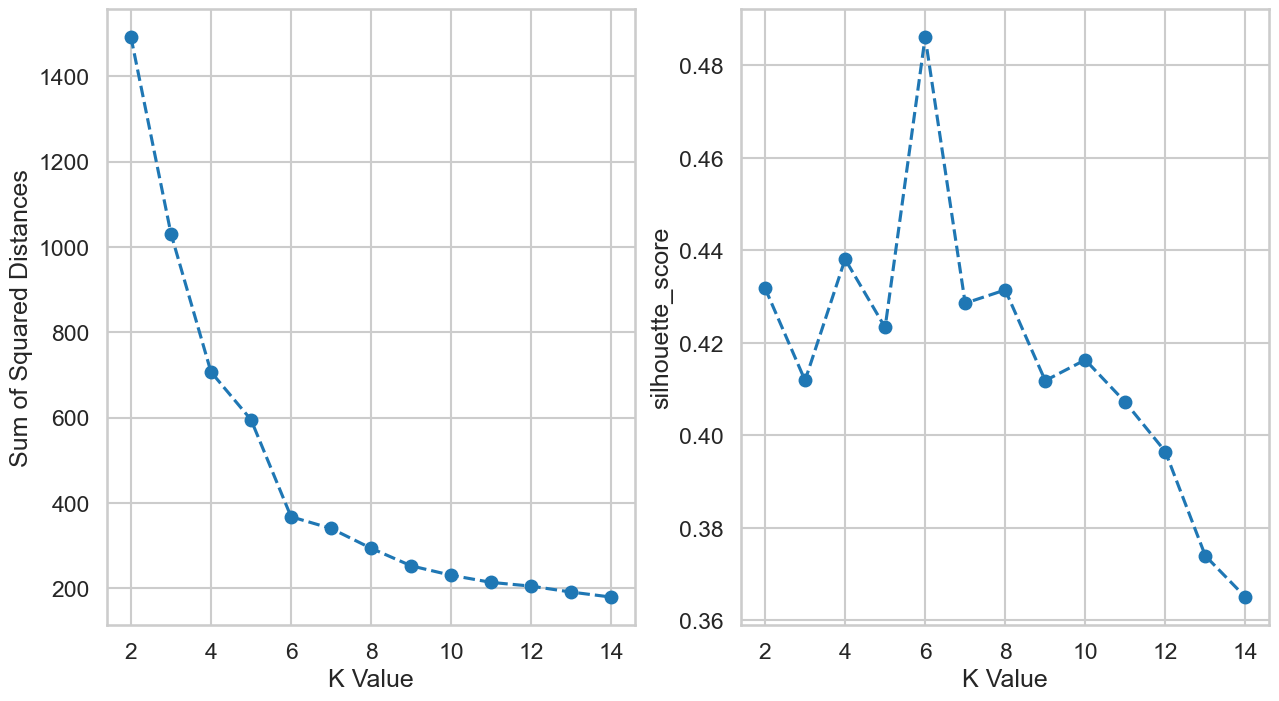

In [113]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 8))
ax1.plot(range(2,15,1), ssd, 'o--')
ax1.set_xlabel("K Value")
ax1.set_ylabel("Sum of Squared Distances")

ax2.plot(range(2,15,1), sil_score, 'o--')
ax2.set_xlabel("K Value")
ax2.set_ylabel("silhouette_score")

Some observation are :
- K = 6 is the optimal K since it has the highest Siloutte score and also it is the elbow in the distortion graph
- scaling the data helps the model achieve higher performance

#### Centroid initialization

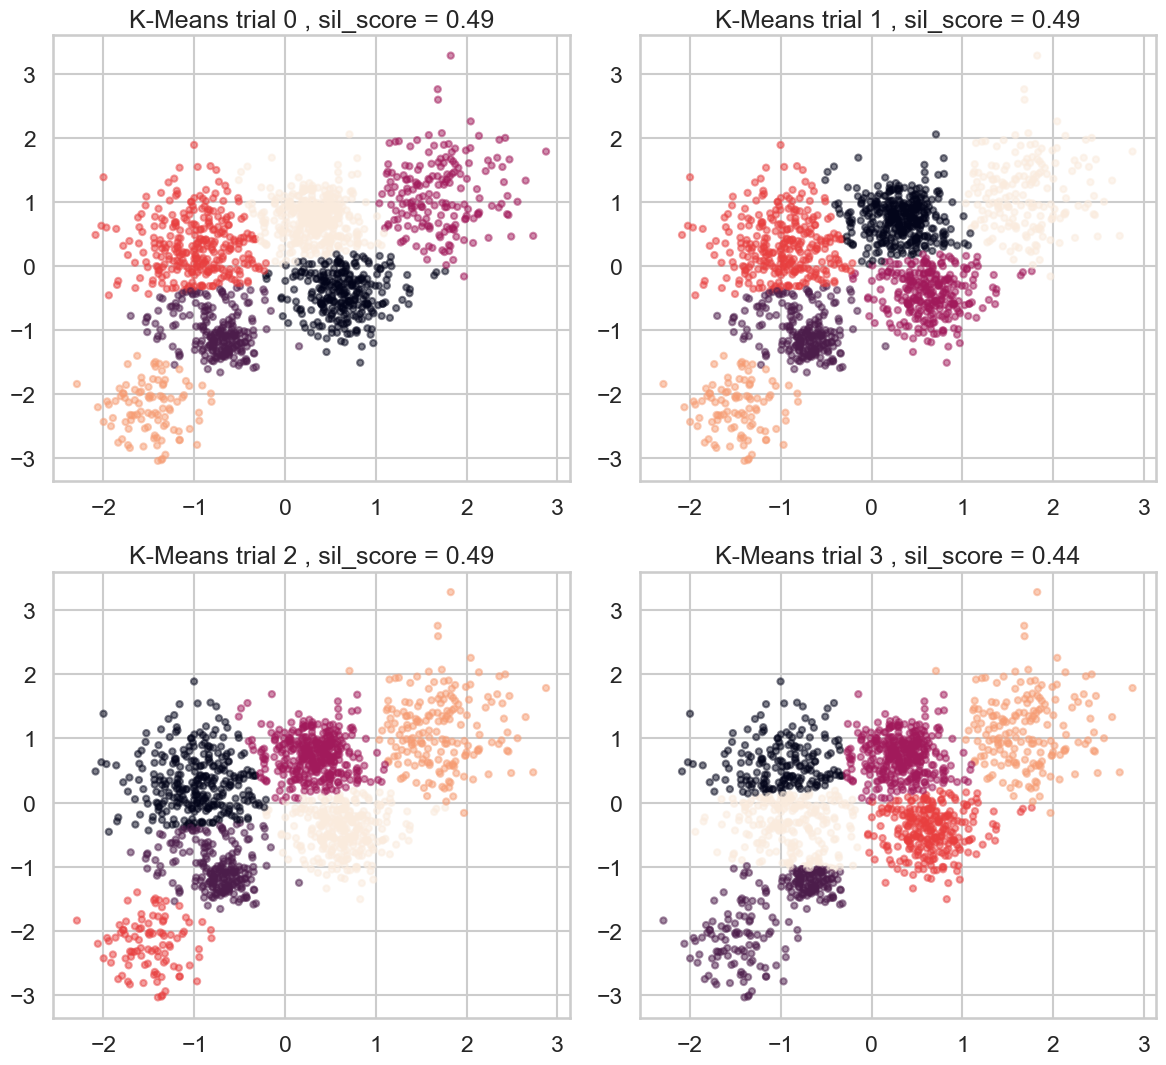

In [154]:
fig, axes = plt.subplots(2, 2, figsize=(12, 11))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten to iterate easily

for i in range(0, 4):
    model = KMeans(n_clusters=6)
    cluster_labels = model.fit_predict(Multi_blob_Data_Scaled)
    axes[i].scatter(Multi_blob_Data_Scaled[:, 0],  
                    Multi_blob_Data_Scaled[:, 1],    
                    c=cluster_labels, alpha=0.5, s=20)
    axes[i].set_title(f'K-Means trial {i} , sil_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels):.2f}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [156]:
sil_score=[]
for i in range(0, 20):
    model = KMeans(n_clusters=6)
    cluster_labels = model.fit_predict(Multi_blob_Data_Scaled)
    sil_score.append(round(silhouette_score(Multi_blob_Data_Scaled,cluster_labels),2))

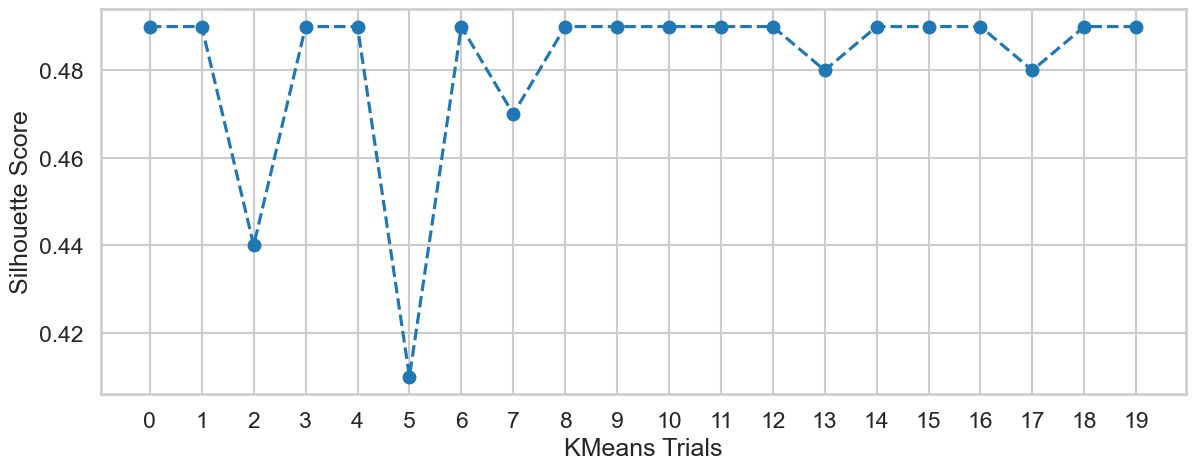

In [157]:
plt.figure(figsize=(14, 5))
plt.plot(range(0, 20, 1), sil_score, 'o--')

plt.xlabel("KMeans Trials")
plt.ylabel("Silhouette Score")

plt.xticks(range(0, 20, 1))  # Force x-axis to show only integers
plt.show()

As we can see the centroid initailization affect the cluster assignment and in turns the performance of the model

- This can be solved using another variation of Kmeans which is Kmeans_plusplus

In [174]:
model = KMeans(n_clusters=6)
cluster_labels = model.fit_predict(Multi_blob_Data_Scaled)
print(f'sil_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels)}')

sil_score = 0.4361002024905842


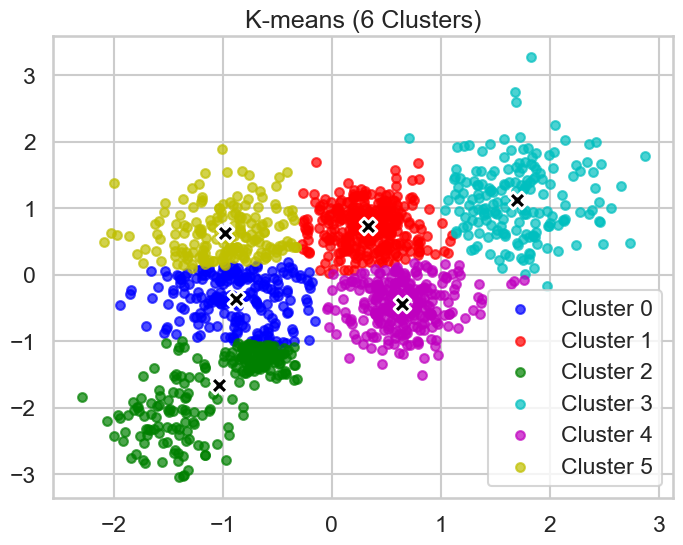

In [176]:
display_cluster(Multi_blob_Data_Scaled,cluster_labels,num_clusters=6,title="K-means")

#### Optimal Model

In [184]:
bestmodel_Kmeans = KMeans(n_clusters=6,init='k-means++')
cluster_labels_Kmeans_plusplus = bestmodel_Kmeans.fit_predict(Multi_blob_Data_Scaled)
silhouette_score_Kmeans = silhouette_score(Multi_blob_Data_Scaled,cluster_labels_Kmeans_plusplus)
print(f'sil_score = {silhouette_score_Kmeans}')

sil_score = 0.4861099840323075


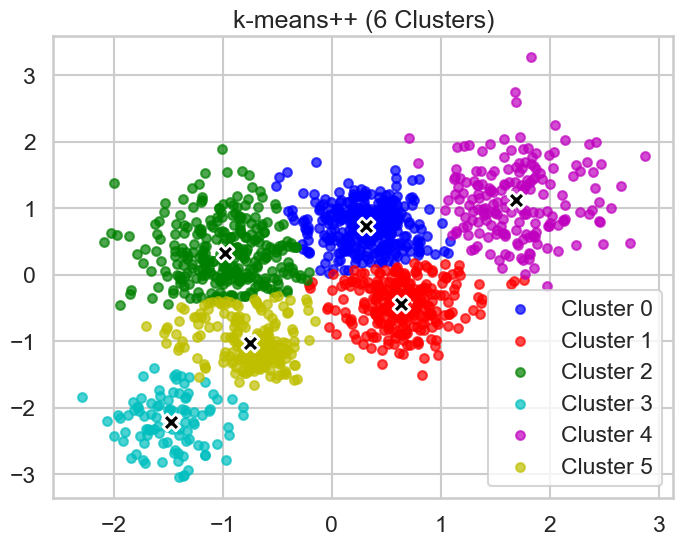

In [188]:
display_cluster(Multi_blob_Data_Scaled,cluster_labels_Kmeans_plusplus,num_clusters=6,title="k-means++")

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

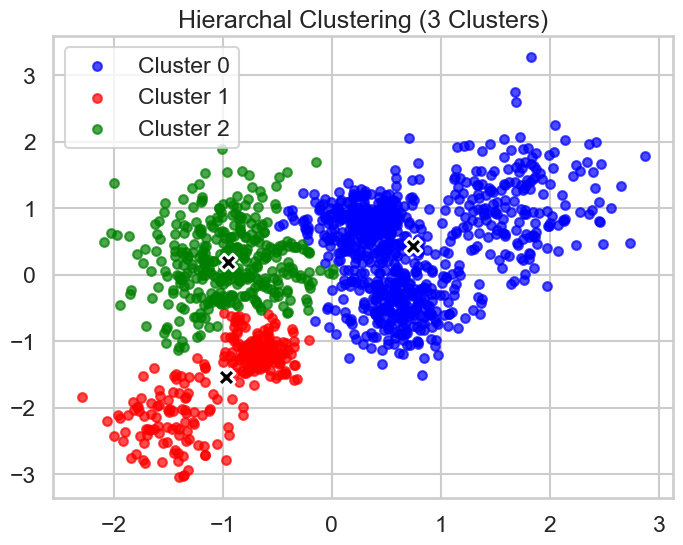


silhouette_score = 0.4088


In [195]:
model = AgglomerativeClustering(n_clusters=3)
cluster_labels = model.fit_predict(Multi_blob_Data_Scaled)
display_cluster(Multi_blob_Data_Scaled,cluster_labels,num_clusters=3,title="Hierarchal Clustering")
print()
print(f'silhouette_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels):.4f}')

#### Trails

* In the  AgglomerativeClustering change the following parameters:
    * Affinity Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. (use euclidean, manhattan and cosine)
    * Linkage {‘ward’, ‘complete’, ‘average’, ‘single’} (try different options)
    * Distance_threshold : The linkage distance threshold at or above which clusters will not be merged. {float} (try different options)

- L1 norm = Manhattan Distance
- L2 norm = Euclidean Distance
* Difference:
    * L1 prefers sparse solutions (used in LASSO).
    * L2 penalizes large errors more (used in Ridge Regression).

##### Affinity = Metric

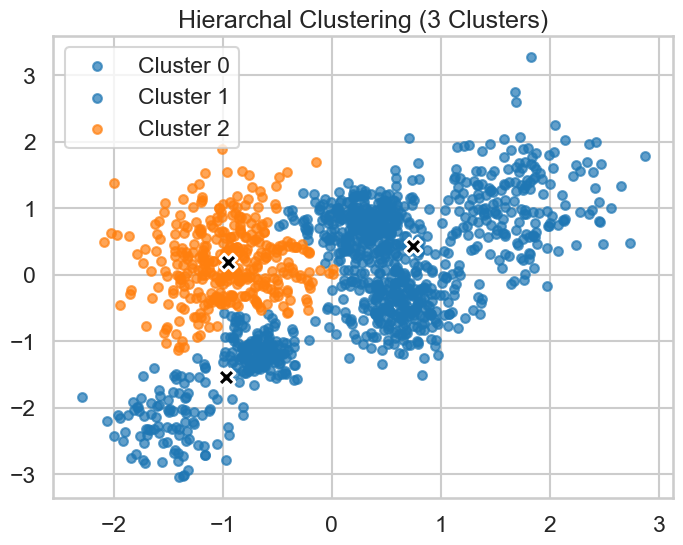


silhouette_score = 0.4088


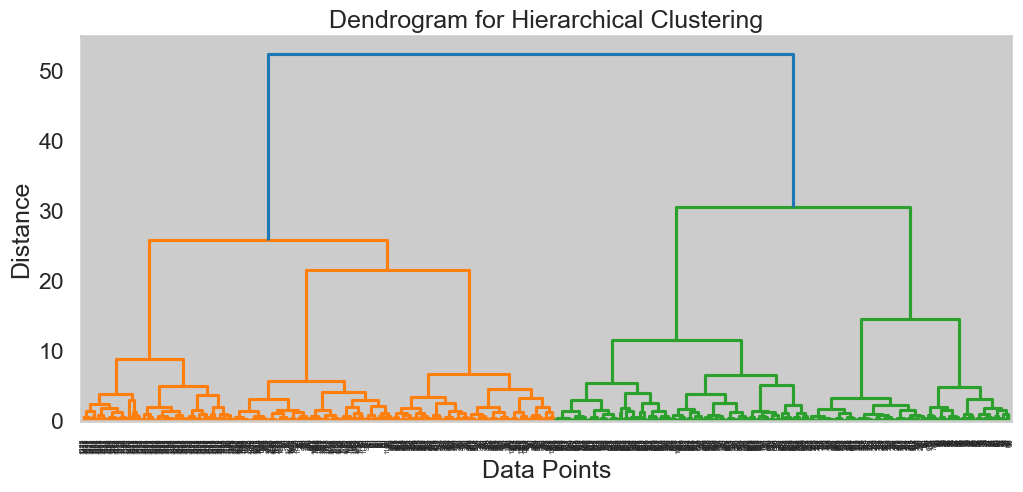

In [362]:
model1 = AgglomerativeClustering(n_clusters=3,metric="euclidean")
cluster_labels1 = model1.fit_predict(Multi_blob_Data_Scaled)
display_cluster(Multi_blob_Data_Scaled,cluster_labels1,num_clusters=3,title="Hierarchal Clustering")
print()
print(f'silhouette_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels1):.4f}')
# Compute the linkage matrix
Z = linkage(Multi_blob_Data_Scaled, method="ward")
# Plot the dendrogram
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode="level", p=10)  # p=10 limits the number of levels displayed
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

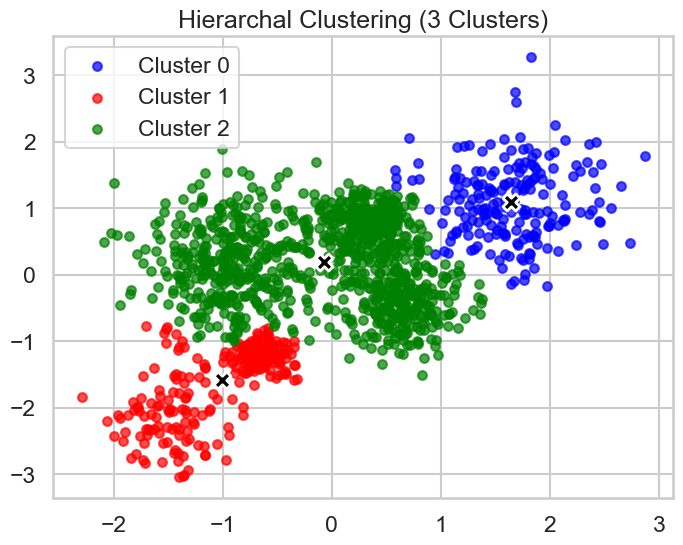


silhouette_score = 0.3575


In [217]:
model2 = AgglomerativeClustering(n_clusters=3,metric="manhattan",linkage="average")
cluster_labels2 = model2.fit_predict(Multi_blob_Data_Scaled)
display_cluster(Multi_blob_Data_Scaled,cluster_labels2,num_clusters=3,title="Hierarchal Clustering")
print()
print(f'silhouette_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels2):.4f}')

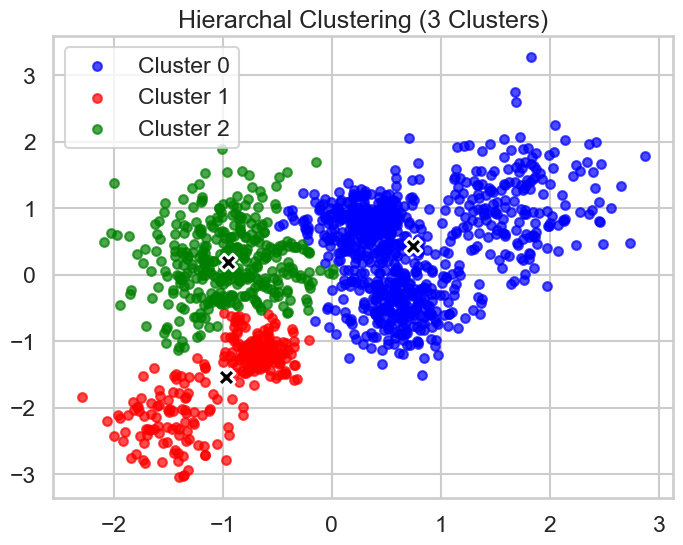


silhouette_score = 0.3292


In [215]:
model3 = AgglomerativeClustering(n_clusters=3,metric="cosine",linkage="average")
cluster_labels3 = model3.fit_predict(Multi_blob_Data_Scaled)
display_cluster(Multi_blob_Data_Scaled,cluster_labels1,num_clusters=3,title="Hierarchal Clustering")
print()
print(f'silhouette_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels3):.4f}')

##### Linkage

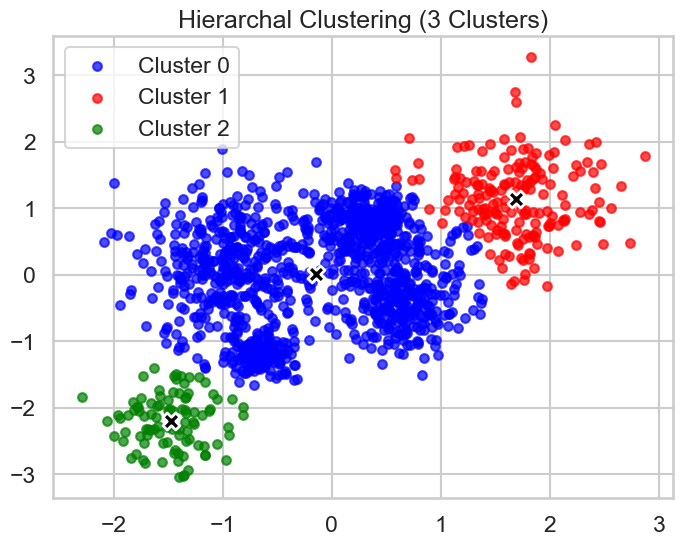


silhouette_score = 0.3188


In [221]:
model1 = AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="complete")
cluster_labels1 = model1.fit_predict(Multi_blob_Data_Scaled)
display_cluster(Multi_blob_Data_Scaled,cluster_labels1,num_clusters=3,title="Hierarchal Clustering")
print()
print(f'silhouette_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels1):.4f}')

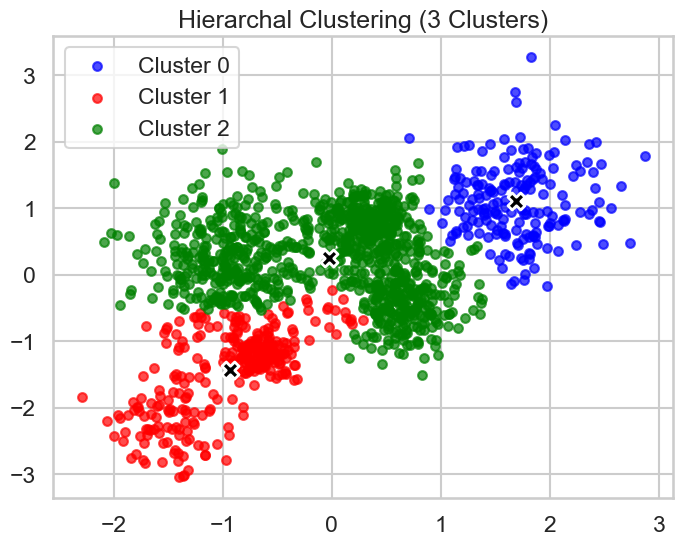


silhouette_score = 0.3622


In [223]:
model2 = AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="average")
cluster_labels2 = model2.fit_predict(Multi_blob_Data_Scaled)
display_cluster(Multi_blob_Data_Scaled,cluster_labels2,num_clusters=3,title="Hierarchal Clustering")
print()
print(f'silhouette_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels2):.4f}')

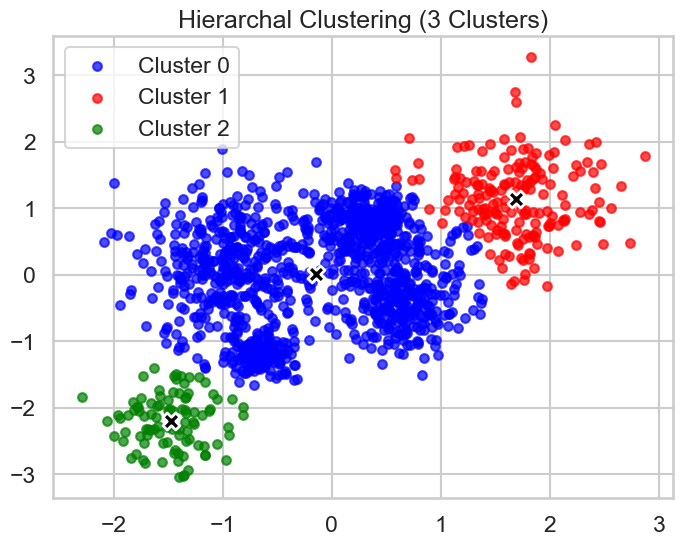


silhouette_score = 0.2576


In [225]:
model3 = AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="single")
cluster_labels3 = model3.fit_predict(Multi_blob_Data_Scaled)
display_cluster(Multi_blob_Data_Scaled,cluster_labels1,num_clusters=3,title="Hierarchal Clustering")
print()
print(f'silhouette_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels3):.4f}')

##### Distance_threshold

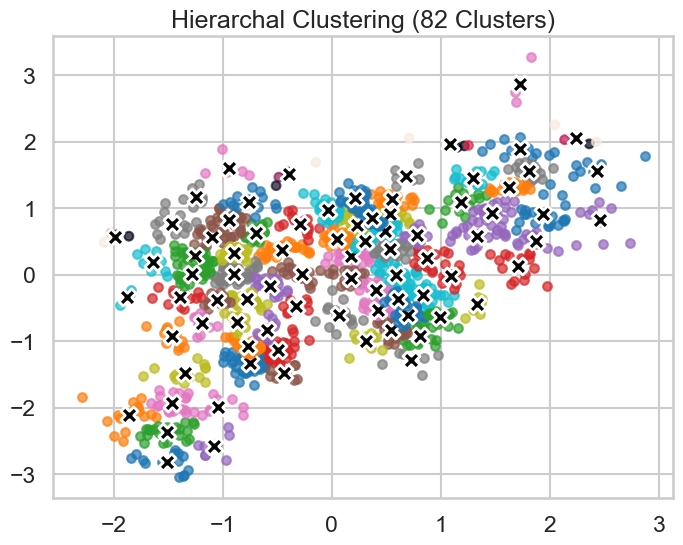


silhouette_score = 0.3331


In [352]:
model1 = AgglomerativeClustering(n_clusters=None,distance_threshold=1)
cluster_labels1 = model1.fit_predict(Multi_blob_Data_Scaled)
c=max(cluster_labels1)
display_cluster(Multi_blob_Data_Scaled,cluster_labels1,num_clusters=c,title="Hierarchal Clustering",legend=False)
print()
print(f'silhouette_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels1):.4f}')

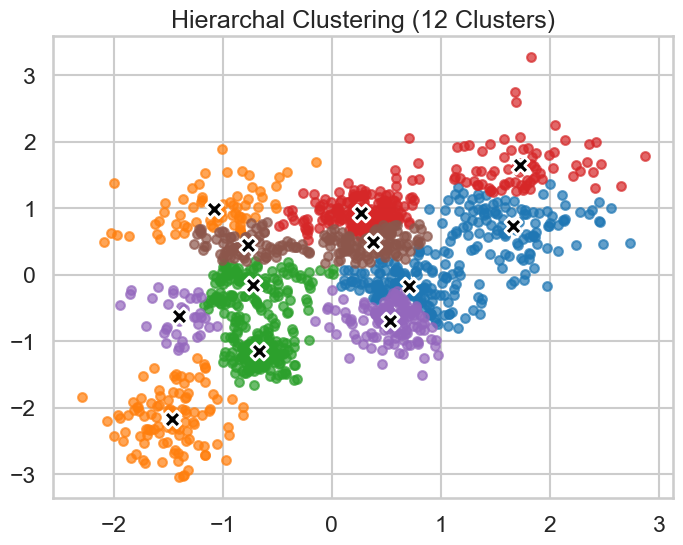


silhouette_score = 0.3336


In [312]:
model1 = AgglomerativeClustering(n_clusters=None,distance_threshold=5)
cluster_labels1 = model1.fit_predict(Multi_blob_Data_Scaled)
c=max(cluster_labels1)
display_cluster(Multi_blob_Data_Scaled,cluster_labels1,num_clusters=c,title="Hierarchal Clustering",legend=False)
print()
print(f'silhouette_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels1):.4f}')

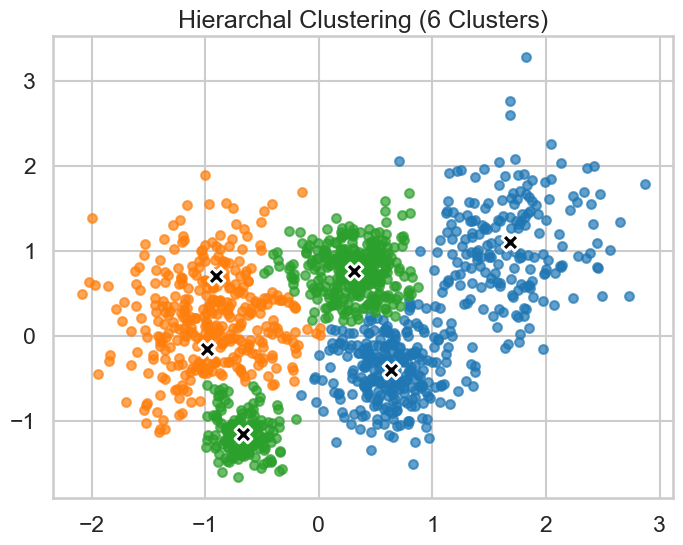


silhouette_score = 0.4549


In [318]:
model1 = AgglomerativeClustering(n_clusters=None,distance_threshold=10)
cluster_labels1 = model1.fit_predict(Multi_blob_Data_Scaled)
c=max(cluster_labels1)
display_cluster(Multi_blob_Data_Scaled,cluster_labels1,num_clusters=c,title="Hierarchal Clustering",legend=False)
print()
print(f'silhouette_score = {silhouette_score(Multi_blob_Data_Scaled,cluster_labels1):.4f}')

#### Tuning

In [330]:
linkage_list = ["average", "single", "complete"]
affinity_list = ["euclidean", "manhattan", "cosine"]
n_clusters_range = np.arange(2, 20)
# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=["model", "n_clusters", "affinity", "linkage", "silhouette_score"])

# Variables to track the best model
best_silhouette = -1
best_n_clusters = None
best_affinity = None
best_linkage = None

# Loop through different cluster numbers, affinity, and linkage types
for n_clusters in n_clusters_range:
    for affinity in affinity_list:
        for linkage in linkage_list:
            try:
                # Train the model
                model = AgglomerativeClustering(n_clusters=n_clusters, metric=affinity, linkage=linkage)
                model.fit(Multi_blob_Data_Scaled)

                # Compute silhouette score
                silhouette = silhouette_score(Multi_blob_Data_Scaled, model.labels_)

                # Append results to DataFrame
                new_row = pd.DataFrame([{
                    "model":model,
                    "n_clusters": n_clusters,
                    "affinity": affinity,
                    "linkage": linkage,
                    "silhouette_score": silhouette
                }])
                results_df = pd.concat([results_df, new_row], ignore_index=True)

                # Print progress
                #print(f"Silhouette Score for {n_clusters} clusters, affinity={affinity}, linkage={linkage}: {silhouette:.4f}")

                # Update best model
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_n_clusters = n_clusters
                    best_affinity = affinity
                    best_linkage = linkage

            except Exception as e:
                print(f"Skipping: n_clusters={n_clusters}, affinity={affinity}, linkage={linkage} due to error: {e}")

# Get the index of the best model from the DataFrame
best_model_index = results_df[
    (results_df["n_clusters"] == best_n_clusters) &
    (results_df["affinity"] == best_affinity) &
    (results_df["linkage"] == best_linkage)
].index[0]

# Print the best model details including index
print(f"\nBest Agglomerative Clustering Model (Index {best_model_index} in DataFrame):")
print(f" - n_clusters: {best_n_clusters}")
print(f" - Affinity: {best_affinity}")
print(f" - Linkage: {best_linkage}")
print(f" - Silhouette Score: {best_silhouette:.4f}")


Best Agglomerative Clustering Model (Index 6 in DataFrame):
 - n_clusters: 2
 - Affinity: cosine
 - Linkage: average
 - Silhouette Score: 0.4236


In [376]:
results_df.sort_values("silhouette_score",ascending=False).head(10)

,model,n_clusters,affinity,linkage,silhouette_score
6,"AgglomerativeClustering(linkage='average', met...",2,cosine,average,0.423607
27,"AgglomerativeClustering(linkage='average', n_c...",5,euclidean,average,0.419060
66,"AgglomerativeClustering(linkage='average', met...",9,manhattan,average,0.417663
63,"AgglomerativeClustering(linkage='average', n_c...",9,euclidean,average,0.417475
75,"AgglomerativeClustering(linkage='average', met...",10,manhattan,average,0.414984
24,"AgglomerativeClustering(linkage='average', met...",4,cosine,average,0.414747
30,"AgglomerativeClustering(linkage='average', met...",5,manhattan,average,0.412069
57,"AgglomerativeClustering(linkage='average', met...",8,manhattan,average,0.410118
36,"AgglomerativeClustering(linkage='average', n_c...",6,euclidean,average,0.410098
3,"AgglomerativeClustering(linkage='average', met...",2,manhattan,average,0.404102


#### Optimal

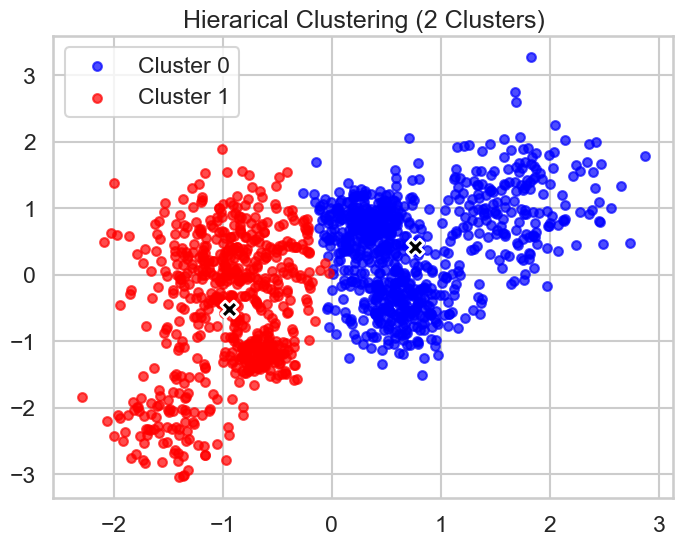

0.423606851876823

In [389]:
bestmodel_Hierarical = AgglomerativeClustering(n_clusters=best_n_clusters, metric=best_affinity, linkage=best_linkage)
cluster_labels_Hierarical = bestmodel_Hierarical.fit_predict(Multi_blob_Data_Scaled)
silhouette_score_Hierarical = silhouette_score(Multi_blob_Data_Scaled,cluster_labels_Hierarical)
display_cluster(Multi_blob_Data_Scaled,cluster_labels_Hierarical,num_clusters=2,title="Hierarical Clustering")
silhouette_score_Hierarical

The optimal parameters found were 
 - n_clusters: 2
 - Affinity: cosine
 - Linkage: average
 - Silhouette Score: 0.4236

which may appear good at first glance due to the silhouette Score but we already know that the data should be clustered into 6 clusters which came 9th place in terms of silhouette score.


### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

## Customer dataset
Repeat all the above on the customer data set 